In [77]:
#Import modules
import pandas as pd
import requests
import json
import csv
import numpy
import random
import seaborn as sb
import matplotlib.pyplot as plt
from config import wkey
from pprint import pprint

In [79]:
#import csv
cities = "citiesweather.csv"

In [80]:
#Randomly select 500 cities
#number of records in file (excludes header)
n = sum(1 for line in open(cities, encoding="utf8")) - 1 
s = 500 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
cities_df = pd.read_csv(cities, skiprows=skip)
cities_df.head()

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,Anaco,Anaco,9.440004,-64.460004,100118.0,Venezuela,VE,VEN,Anzoátegui
1,Praia,Praia,14.916698,-23.516689,101111.5,Cape Verde,CV,CPV,NaN
2,Cherkessk,Cherkessk,44.290409,42.060006,101153.0,Russia,RU,RUS,Karachay-Cherkess
3,Koutiala,Koutiala,12.390418,-5.469987,102140.0,Mali,ML,MLI,Sikasso
4,Houma,Houma,35.619982,111.209997,102400.0,China,CN,CHN,Shanxi


In [81]:
cities_df.columns

Index(['city', 'city_ascii', 'lat', 'lng', 'pop', 'country', 'iso2', 'iso3',
       'province'],
      dtype='object')

In [82]:
cities_reduced_df = cities_df[['city','lat', 'lng', 'country']]
#cities_reduced_df.head()
cities_df = cities_reduced_df
cities_df.head()

,city,lat,lng,country
0,Anaco,9.440004,-64.460004,Venezuela
1,Praia,14.916698,-23.516689,Cape Verde
2,Cherkessk,44.290409,42.060006,Russia
3,Koutiala,12.390418,-5.469987,Mali
4,Houma,35.619982,111.209997,China


In [83]:
#Add empty columns to df 
cities_df["Temperature (F)"] = ""
cities_df["Cloudiness %"] = ""
cities_df["Wind Speed (mph)"] = ""
cities_df["Humidity %"] = ""
cities_df.head()

,city,lat,lng,country,Temperature (F),Cloudiness %,Wind Speed (mph),Humidity %
0,Anaco,9.440004,-64.460004,Venezuela,,,,
1,Praia,14.916698,-23.516689,Cape Verde,,,,
2,Cherkessk,44.290409,42.060006,Russia,,,,
3,Koutiala,12.390418,-5.469987,Mali,,,,
4,Houma,35.619982,111.209997,China,,,,


In [84]:
len(cities_df)


500

In [85]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={wkey}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=imperial&q=


In [86]:
cityList = cities_df['city'].tolist()
print(cityList)

['Anaco', 'Praia', 'Cherkessk', 'Koutiala', 'Houma', 'Rochester', 'Bage', 'Piatra-Neamt', 'Sassari', 'Agadez', 'Gera', 'Gafsa', 'Zhezqazghan', 'Drobeta-Turnu Severin', 'Uroteppa', 'Schenectady', 'Hailun', 'Trento', 'Boulder', 'Segou', 'Bandundu', 'Male', 'Shizuishan', 'Dong Hoi', 'Mzuzu', 'As Salt', 'Kandy', 'Kecskemet', 'Nakhon Sawan', 'Riohacha', 'Port-Gentil', 'Zhijiang', 'Sullana', 'Larache', 'Visalia', 'Nabeul', 'Gharyan', 'San Nicolas', 'Niagara Falls', 'Lysychansk', 'Trois-Rivières', 'Shuangcheng', 'Zarzis', 'Puerto Plata', 'Panevežys', 'My Tho', 'Guarapuava', 'Takaoka', 'Tengchong', 'Tay Ninh', 'Braganca Paulista', 'Kashmar', 'Hathras', 'Al Marj', 'Nema', 'Albacete', 'Bremerhaven', 'Ibarra', 'Namibe', 'Kalamazoo', 'Baydhabo', 'Orekhovo-Zuevo', 'Kolomna', 'Abohar', 'Gottingen', 'Kumba', 'Kadugli', 'Concordia', 'Fort Pierce', 'Bratsk', 'Kerch', 'Nevinnomyssk', 'Souk Ahras', 'Lafayette', 'Ras al Khaymah', 'El Manaqil', 'Hancheng', 'Dawei', 'Arnhem', 'Jieshou', 'Perugia', 'Massawa'

In [87]:
#test request.get
response = requests.get(query_url + "London")
print(response.url)

response = requests.get(query_url + "London").json()

pprint (response)

http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=imperial&q=London
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1522129800,
 'id': 2643743,
 'main': {'humidity': 81,
          'pressure': 1008,
          'temp': 40.84,
          'temp_max': 42.8,
          'temp_min': 39.2},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 5091,
         'message': 0.1664,
         'sunrise': 1522129618,
         'sunset': 1522175139,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'},
             {'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'},
             {'description': 'light intensity drizzle rain',
              'icon': '09d',
              'id': 310,
              'main': 'Drizzle'}],
 'wind': {'deg': 140, 'speed': 10.29}}


In [88]:
#Want to skip missing values ahead of time so code runs more quickly - this is just for me to practice different options
# To learn JSON respones better...
#cityList = cities_df['city'].tolist()
#for city in cityList:
    #response = requests.get(query_url + str(city)).json()
   # if (response['cod']=="404"):
       # print(response)
    
    
    
   

{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city 

In [76]:
for index, row in cities_df.iterrows():
    
    city = row['city']
    
    response = requests.get(query_url + str(city))
    print(response.url)

http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=V%C3%A4ster%C3%A5s
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Cherkessk
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Bontang
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Rochester
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Fresnillo
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Khiwa
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Sassari
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Biak
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Gera
http://api

http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Melitopol
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Sarh
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Bata
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Nizhenvartovsk
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Tiraspol
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Chincha%20Alta
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=San%20Francisco%20de%20Macoris
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Cajamarca
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=

http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Bayamo
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Arica
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Fort%20Collins
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Turpan
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Severodvinsk
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Laayoune
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Petropavlovsk%20Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Biratnagar
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metr

http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Raichur
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Fukui
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Boise
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Kassel
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Chimoio
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Kirovohrad
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Sivas
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Buenaventura
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Petrozavodsk
http://api.op

http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Rajapalaiyam
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=San%20Cristobal
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Tamale
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Kurnool
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Mykolayiv
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Rahim%20Yar%20Khan
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Lublin
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Jeju
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Trablo

http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=At%20Taif
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Ogbomosho
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Hamhung
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Poznan
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Shaoxing
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Namangan
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Cardiff
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Belgaum
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Izhevsk
http://api.ope

http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Kampala
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Bamako
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Hyderabad
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Fushun
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Datong
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Kumasi
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Santiago
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Xiamen
http://api.openweathermap.org/data/2.5/weather?appid=04c02a0d186c77daef20ed362336588c&units=metric&q=Xuzhou
http://api.openweather

In [51]:
for index, row in cities_df.iterrows():
    
    city = row['city']
    
    response = requests.get(query_url + str(city)).json()
    
    try:
        cities_df.set_value(index, "Temperature (F)",
                            response['main']["temp"])
        cities_df.set_value(index, "Cloudiness %",
                            response["clouds"]["all"])
        cities_df.set_value(index, "Wind Speed (mph)",
                            response["wind"]["speed"])
        cities_df.set_value(index, "Humidity %",
                            response["main"]["humidity"])
        
    except:
        print("Missing field/result... skipping.")
        
print("check complete")

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

In [54]:
cities_df.head()

In [ ]:
cities_df.to_csv("csvweatherpy.csv", header = True)

In [58]:
cities_df_filter = cities_df[cities_df["Temperature (F)"] != ""]
cities_df_filter

In [65]:
cities_df_filter.to_csv("csvweatherpy_filter.csv", header = True)

In [60]:
cities_df_filter.dtypes

city                 object
lat                 float64
lng                 float64
country              object
Temperature (F)      object
Cloudiness %         object
Wind Speed (mph)     object
Humidity %           object
dtype: object

In [59]:
print(type(cities_df["Temperature (F)"]))

<class 'pandas.core.series.Series'>


In [ ]:
#cities_df["Latitude"] = cities_df["Latitude"].astype(float)
#cities_df["Temperature (F)"] = cities_df["Temperature (F)"].astype(float)
#cities_df["Cloudiness %"] = cities_df["Cloudiness %"].astype(float)
#cities_df["Wind Speed (mph)"] = cities_df["Wind Speed (mph)"].astype(float)
#cities_df["Humidity %"] = cities_df["Humidity %"].astype(float)

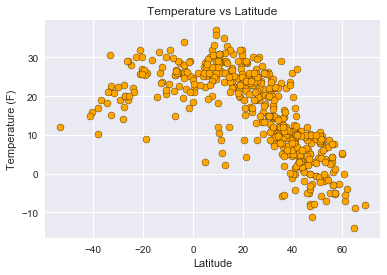

In [63]:
#Temp Plot
sb.set()

x = cities_df_filter["lat"]
y = cities_df_filter["Temperature (F)"]

plt.scatter(x, y, marker="o", facecolors="orange", edgecolors="black")
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

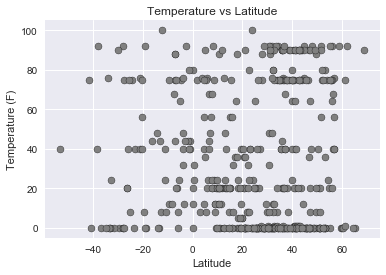

In [67]:
#Cloud Plot
sb.set()



x = cities_df_filter["lat"]
y = cities_df_filter["Cloudiness %"]

plt.scatter(x, y, marker="o", facecolors="gray", edgecolors="black")
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.show()

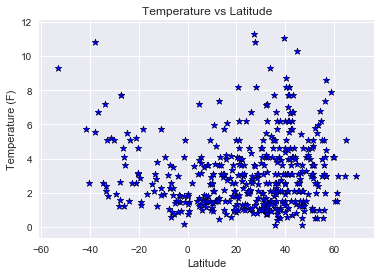

In [70]:
#Wind Plot
x = cities_df_filter["lat"]
y = cities_df_filter["Wind Speed (mph)"]

plt.scatter(x, y, marker="*", facecolors="blue", edgecolors="black")
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.show()

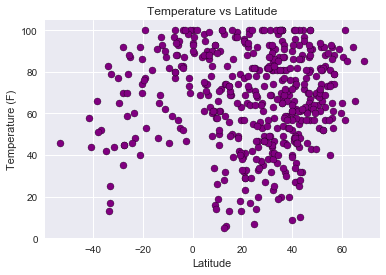

In [71]:
#Humid Plot
x = cities_df_filter["lat"]
y = cities_df_filter["Humidity %"]

plt.scatter(x, y, marker="o", facecolors="purple", edgecolors="black")
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.show()

In [ ]:
#Useful code has ended.
#Code beyond this point is not needed.

In [ ]:
#append values directly to empty rows created earlier to avoid re-creating df
cityList = cities_df['City'].tolist()
temp = []
wind = []
humid = []
cloud = []

for city in cityList:
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        wind.append(response['wind']['speed'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
    
    except(KeyError, IndexError):
            print("missing value, skipping")


In [ ]:
cities_df = pd.DataFrame({
    "Cities": cities_df["city"],
    "Country": cities_df["country"],
    "Latitude": cities_df["lat"],
    "Longitude": cities_df["lng"],
    "Temperature (F)": temp,
    "Cloudiness %": cloud,
    "Wind Speed (mph)": wind,
    "Humidity %": humid},
    columns = ["City", "Country", "Latitude", "Longitude", "Temperature (F)", "Cloudiness %", "Wind Speed (mph)", "Humidity %"])

cities_df.head()